# Pymaceuticals Inc.
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
count = len(merged_df["Mouse ID"].unique())
count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#See "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html"
duplicate = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_info = merged_df.loc[(merged_df['Mouse ID'] == 'g989')] 
duplicate_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= merged_df[merged_df['Mouse ID'].isin(duplicate)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_count = len(clean_df["Mouse ID"].unique())
clean_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_mean

regimen_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_median

regimen_variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_variance

regimen_stdev = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_stdev

regimen_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
regimen_sem

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean": regimen_mean,
    "Median": regimen_median,
    "Variance": regimen_variance,
    "Standard Deviation": regimen_stdev,
    "SEM": regimen_sem
})

summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

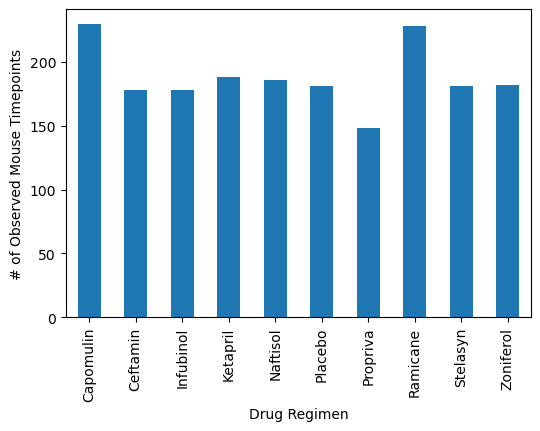

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_type = clean_df.groupby('Drug Regimen')
regimen_count = regimen_type['Drug Regimen'].value_counts()

bar_plot = regimen_count.plot(kind='bar', figsize=(6,4))
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("# of Observed Mouse Timepoints")

plt.show()

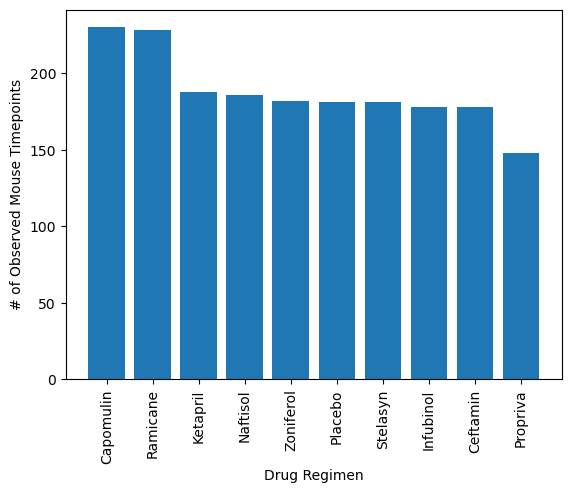

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(regimen_counts))

plt.bar(x_axis, regimen_counts, alpha=1, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_counts.index.values)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(tick_locations, rotation="vertical")
plt.show()

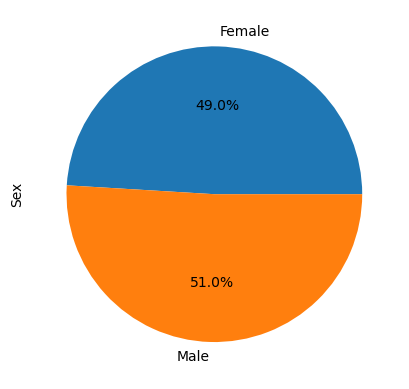

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df.groupby("Sex")
gender_count = gender["Sex"].count()

plot = gender_count.plot(kind = "pie", y = "Sex", autopct="%1.1f%%")
plt.show()

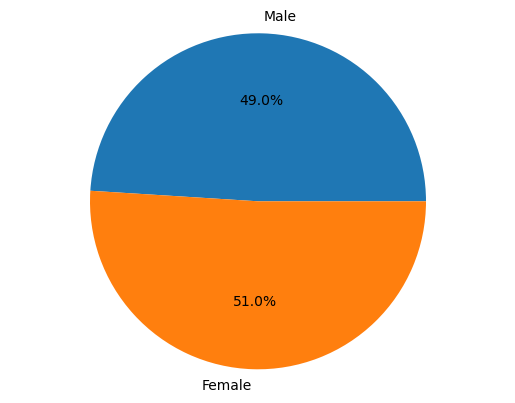

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
counts = [49, 51]
plt.pie(counts, labels=labels, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(clean_df, timepoint, on=["Mouse ID", "Timepoint"], how="left")
tumor_volume_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Put treatments into a list for for loop (and later for plot labels
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_regimen = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(tumor_regimen)

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_regimen.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
# Determine outliers using upper and lower bounds
    outliers = tumor_regimen.loc[(tumor_regimen < lower_bound) | (tumor_regimen > upper_bound)]     

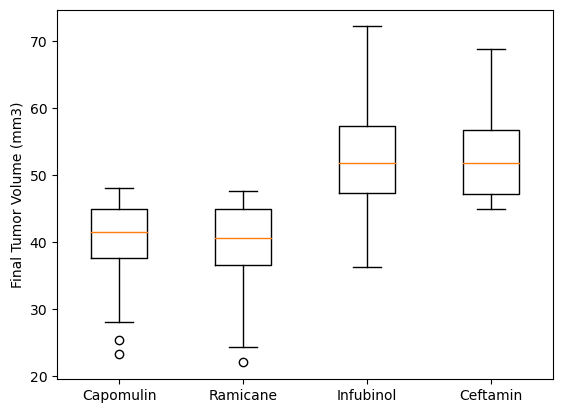

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol, labels=treatments)
plt.show()

## Line and Scatter Plots

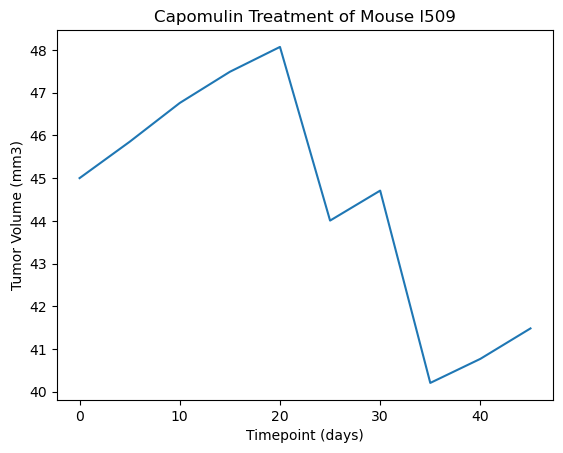

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

#Picking my mouse
mouse = capomulin.loc[capomulin["Mouse ID"] == 'l509']

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

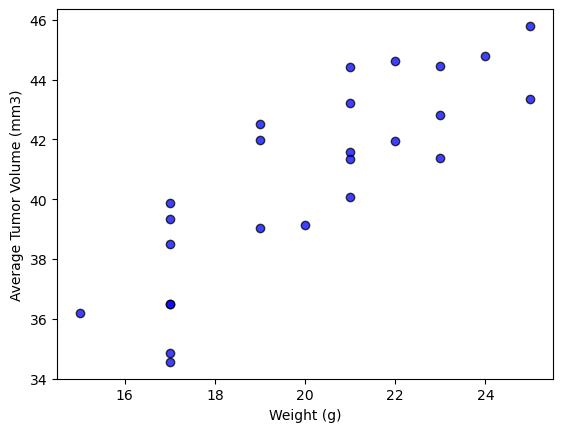

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
average_tumor= capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df["Weight (g)"].unique()


plt.scatter(mouse_weight, average_tumor, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [355]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
